# Linear Regression


In [1]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['image.interpolation'] = 'nearest'

Populating the interactive namespace from numpy and matplotlib


$$ f(x) = x^4-4x^3+2 $$

In [2]:
f=lambda x: x**4-4*x**3+2

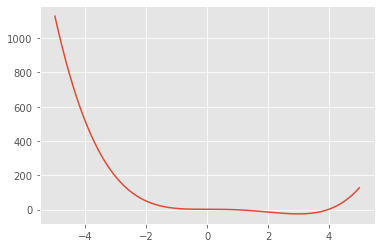

In [3]:
x=np.linspace(-5,5,1000)
y= f(x)
plt.plot(x,y)

### Brute-force Search
Lets do a brute-force search for the given variable in the limit.

In [4]:
minimum=+inf
mx=+inf
import numpy as np


for i in np.linspace(-5,5,1000):
    if f(i)<minimum:
        minimum=f(i)
        mx=i


print("Local minimum occurs at {}".format(mx))

Local minimum occurs at 2.997997997997998


### Gradient Descent

In [5]:
def f_derivative(x):
  
    # Calculate the derivative and write your code here
    first=(4*pow(x,3))
    derivative=first+12*pow(x,2)
    return derivative

In [6]:
x_old = 0
x_new = np.random.rand(1,1) 
eps = 0.01 # step size
precision = 0.00001

for i in np.linspace(-5,5):
    x_old=x_new
    x_new=x_old-f_derivative(x_old)*eps
    

print ("Local minimum occurs at", x_new)

Local minimum occurs at [[0.10531495]]


#### Always Check your gradient, before debugging gradient descent,

We know that $$\frac{\partial f}{\partial x}=\frac{f(x+\epsilon)-f(x)}{\epsilon}$$

So always compare the difference between computed gradient using this formula.


#### Lets Check

In [7]:
eps=0.00001
x=1.5
dfx=(f(x+eps)-f(x))/eps
cdfx=f_derivative(x)

print (dfx, cdfx, dfx-cdfx)

-13.500044999936732 40.5 -54.00004499993673


### Let's generate some random data

In [8]:
X = np.arange(0,5,0.1, dtype=np.float32)
delta = np.random.uniform(-1,1, size=X.shape[0])
Y = .4 * X + 3 + delta

#making a copy for later use
rx = X
ry = Y

Text(0, 0.5, 'Y')

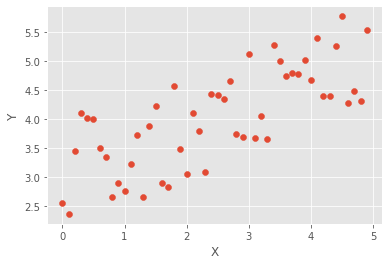

In [9]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

### Time for our regression implementation

$$
h(X, \theta) = X^T . \theta
$$

In [10]:
def hyp(theta, X):
    # Your code here
    return np.dot(theta,X)
    

$$
cost = \frac{1}{2m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)}^2
$$

In [11]:
def cost_function(theta,X,Y):

    # Your code here
    sum= np.sum(((hyp(X,theta) - Y)**2))
    cost= sum/ (2 * X.shape[0])
    print(cost)
    
    return cost

$$
\frac{\delta}{\delta \theta_j} = \frac{1}{m} \sum_{i = 0}^m{(h(X^i, \theta)-Y^i)} * X_j
$$

In [12]:
def derivative_cost_function(theta,X,Y):
    
    
    # Your code here
   
    cost = (np.sum(hyp(X,theta) - Y) *X) / X.shape[0]
    print(cost)
    
   
    return cost


*** Give Temporary values to cost function and derivative cost function before getting onto gradiant descent***

*** To make sure that your both function are working fine ***

In [13]:
print (X.shape)
nx=np.hstack((X,ones(len(X),)))
nx=nx.reshape((2,X.shape[0])).T
print (nx.shape)

(50,)
(50, 2)


In [14]:
np.random.seed(20) # To make sure you have the same value as me
eps=0.0001
nexamples=float(nx.shape[0])
thetas=np.random.rand(nx.shape[1],)
print (thetas)

[0.5881308  0.89771373]


In [15]:
cf=cost_function(thetas,nx,Y)
print (cf)

1.6101443266033406
1.6101443266033406


In [16]:
ad=derivative_cost_function(thetas,nx,Y)
print (ad)

[[-0.         -1.68599261]
 [-0.16859926 -1.68599261]
 [-0.33719853 -1.68599261]
 [-0.5057978  -1.68599261]
 [-0.67439705 -1.68599261]
 [-0.8429963  -1.68599261]
 [-1.01159561 -1.68599261]
 [-1.18019481 -1.68599261]
 [-1.34879411 -1.68599261]
 [-1.51739341 -1.68599261]
 [-1.68599261 -1.68599261]
 [-1.85459191 -1.68599261]
 [-2.02319121 -1.68599261]
 [-2.19179051 -1.68599261]
 [-2.36038961 -1.68599261]
 [-2.52898891 -1.68599261]
 [-2.69758822 -1.68599261]
 [-2.86618752 -1.68599261]
 [-3.03478682 -1.68599261]
 [-3.20338592 -1.68599261]
 [-3.37198522 -1.68599261]
 [-3.54058472 -1.68599261]
 [-3.70918382 -1.68599261]
 [-3.87778292 -1.68599261]
 [-4.04638242 -1.68599261]
 [-4.21498152 -1.68599261]
 [-4.38358103 -1.68599261]
 [-4.55218013 -1.68599261]
 [-4.72077923 -1.68599261]
 [-4.88937873 -1.68599261]
 [-5.05797783 -1.68599261]
 [-5.22657733 -1.68599261]
 [-5.39517643 -1.68599261]
 [-5.56377553 -1.68599261]
 [-5.73237503 -1.68599261]
 [-5.90097413 -1.68599261]
 [-6.06957363 -1.68599261]
 

In [17]:
#Gradient Descent...
def GradientDescent(X,Y,maxniter=20000):
    nexamples=float(X.shape[0])
    thetas=rand(X.shape[1],)
    
    
    alpha=0.01
    numiter=400
    theta=0
    # Your code here
    xTrans = X.transpose()
    for i in range(0, numiter):
        h=hyp(X,theta)
        loss= h.T-Y
        Cost = sum(loss**2)/2.0*nexamples
        print(Cost)
        gradiants= np.dot(X.T,loss.T) / nexamples
    
        

        theta = theta - alpha * gradiants
    return theta

In [18]:
theta_new=GradientDescent(nx,Y)

42297.61076724635
35984.89731485069
30736.747583583554
26373.09345954599
22744.32742652566
19726.14979266261
17215.28757022674
15125.937557978821
13386.811118604192
11938.678867315564
10732.330705683766
9726.880940093593
8888.360109641471
8188.545023150644
7603.9867093884395
7115.2028011051325
6706.006536950892
6362.949270725944
6074.857286843803
5832.446968985993
5628.005067570629
5455.123053793565
5308.476410852715
5183.641260694706
5076.9420105345835
4985.324771783729
4906.25219167555
4837.616075375496
4777.664789102646
4724.942943878388
4678.241282487467
4636.555043656307
4599.049369426094
4565.030564280202
4533.922216131831
4505.245356730204
4478.601978169463
4453.661337775438
4430.148579682893
4407.8352812074045
4386.531598409922
4366.079740331435
4346.348547137404
4327.228985432395
4308.630405594681
4290.4774322260055
4272.707380617569
4255.268110250282
4238.116241399749
4221.215673422504
4204.536353690471
4188.053254773573
4171.745524642813
4155.59578062533
4139.589522794121
41

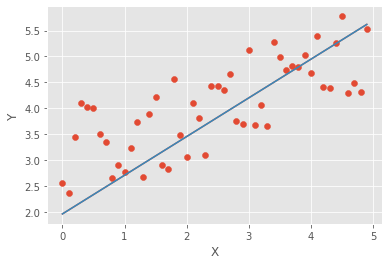

In [20]:
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(nx[:,0],np.dot(nx,theta_new))